<a href="https://colab.research.google.com/github/AshutoshKumarDubey/Topic_modeling_on_news_Articles/blob/main/Topic_Modelling_on_News_Articles_BY_Ashutosh_Kumar_Dubey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Let's Begin!**

## **Importing Neccessary Modules**

Now in this section we'll import all the neccessary libraries and packages we'll require to develop the required model.

In [ ]:
# importing os module
import os

# importing CountVectorizer for feature extraction
from sklearn.feature_extraction.text import CountVectorizer

# Importing data manipulation libraries
import numpy as np
import pandas as pd

# importing tqdm and display modules for progress meters/bars
from IPython.display import display
from tqdm import tqdm

# importing wordcloud to represent topics wordcloud
from wordcloud import WordCloud

# Model selection modules
from sklearn.model_selection import GridSearchCV

# Importing Counter
from collections import Counter

# import ast(abstract syntax tree)
import ast

# importing data visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

# importing mlab for implementing MATLAB functions
import matplotlib.mlab as mlab

# importing statistics module
import scipy.stats as stats

# importing TSNE for data exploration and visualizing high-dimensional data
from sklearn.manifold import TSNE

# importing decomposition modules
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation

# importing Natural Language Toolkit and other NLP modules
import nltk
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob, Word

# importing countVectorizer for text vectorization
from sklearn.feature_extraction.text import CountVectorizer

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting the Google Drive to access data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Note:-** The dataset in this case isn't collective, its been stored in form of numerous text files sub-categorized in 5 different domains. Hence, for loading the data we'll visit all text files individually and copy all articles to a dataframe along with their category.

In [ ]:
# The variable "directory" holds the address of text files stored in drive
directory = '/content/drive/MyDrive/bbc'

# All 5 sub-categories provided
subdirs = ['business', 'entertainment', 'politics', 'sport', 'tech']

# Create dataframe for gathering the articles
bbc = pd.DataFrame()
 
# Iterate over sub-directories to access the text files
for subdir in subdirs:

  # address to the subdirectory
  dir = directory + '/' + subdir

  # Iterate over all the text files present in a sub-directory
  for filename in os.listdir(dir):
    
    # Get file address
    filepath = os.path.join(dir, filename)

    # Traversing over text files and storing the articles into the dataframe
    try:
      data = open(filepath,'r').read()

      # escape characters to be ignored in the text
      escape = ['\n']
      
      # removing escape characters from text
      for elem in escape:
        data = data.replace(elem, ' ')
      
      # Storing article to the dataframe
      dict1 = {'Filename': filename.split('.')[0], 'Contents': data.lower(), 'Category':subdir}
      bbc = bbc.append(dict1, ignore_index=True, verify_integrity = True)

    # Ignore exception, if any
    except:
      pass    

## **Understanding the Data**

Now we'll gather the data files and perform some basic operations to understand the data and how we can process it to improve the model performance. We will also apply some basic EDA to better understand the data.

**The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology.**
There are over 2000 news article available in these categories.

Note:- There was a particular file in this dataset which was formatted differently from the rest of the files, hence while reading the data, the text formatting was throwing an exception. For such case we have neglected the file altogether, since the case was relevant to only a single file. 

In [ ]:
# Display dataframe
bbc

,Filename,Contents,Category
0,472,china suspends 26 power projects china has or...,business
1,510,lacroix label bought by us firm luxury goods ...,business
2,509,euro firms miss out on optimism more than 90%...,business
3,486,india's reliance family feud heats up the ong...,business
4,506,trial begins of spain's top banker the trial ...,business
...,...,...,...
2219,002,china net cafe culture crackdown chinese auth...,tech
2220,016,global blogger action day called the global w...,tech
2221,036,microsoft seeking spyware trojan microsoft is...,tech
2222,017,finding new homes for old phones re-using old...,tech


**The dataset consists of the following attributes:**

●	Index: Entry index.

●	FileName: Destination File name/number.

●	Contents: Complete transcript of a article, this contains all the textual data present in the destination file for a particular entry.

●	Category: Theme/domain of a article.


In [ ]:
# Size of dataset
bbc.shape

(2224, 3)

Now, lets check if a particular article is being stored more than once into the dataframe. Having duplicates in our data would cause inconsistencies in results.

In [ ]:
# Checking for duplicate rows
bbc[bbc.duplicated(subset = "Contents")]

,Filename,Contents,Category
127,215,sec to rethink post-enron rules the us stock ...,business
157,240,economy 'strong' in election year uk business...,business
370,333,troubled marsh under sec scrutiny the us stoc...,business
450,292,steady job growth continues in us the us crea...,business
464,258,s korea spending boost to economy south korea...,business
...,...,...,...
2205,004,digital guru floats sub-$100 pc nicholas negr...,tech
2208,040,apple ipod family expands market apple has ex...,tech
2209,012,ibm puts cash behind linux push ibm is spendi...,tech
2213,027,warning over tsunami aid website net users ar...,tech


We can see there are 99 duplicate rows, it resembles that these articles are present more than once, we need to drop such rows before we proceed further with the model development.


In [ ]:
# Dropping duplicate entries
bbc = bbc.drop_duplicates(subset=['Contents'], keep='first')
bbc

,Filename,Contents,Category
0,472,china suspends 26 power projects china has or...,business
1,510,lacroix label bought by us firm luxury goods ...,business
2,509,euro firms miss out on optimism more than 90%...,business
3,486,india's reliance family feud heats up the ong...,business
4,506,trial begins of spain's top banker the trial ...,business
...,...,...,...
2218,028,piero gives rugby perspective bbc sport unvei...,tech
2219,002,china net cafe culture crackdown chinese auth...,tech
2220,016,global blogger action day called the global w...,tech
2222,017,finding new homes for old phones re-using old...,tech


In [ ]:
# Size of dataset after removing duplicates
bbc.shape

(2125, 3)

In [ ]:
#Checking null values in columns 
bbc.isnull().sum()

Filename    0
Contents    0
Category    0
dtype: int64

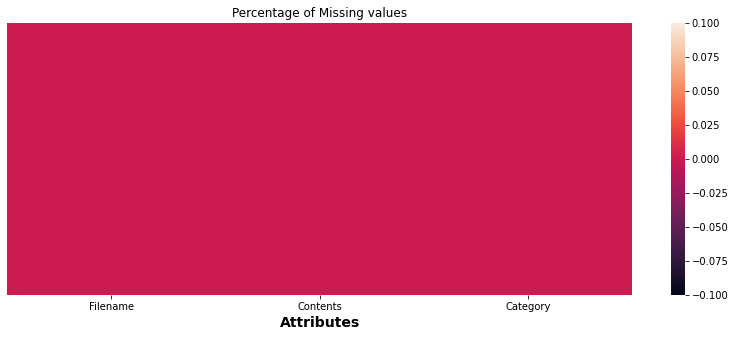

In [ ]:
#PLottinh the heatmap for null values
plt.figure(figsize=(14, 5))
sns.heatmap(bbc.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Attributes", size=14, weight="bold")
plt.title("Percentage of Missing values")
plt.show()

<u/>**Why this plot?**</u>

A heat map helps you visualize density. It is a graphical representation of data where values are depicted by color.

**Inference**

There are no missing values.



# **Exploratory Data Analysis**

### **Categories**

Now, lets see how many articles are there across all 5 categories.

In [ ]:
# Grouping rows based on categories and counting number of entries
df = bbc.groupby(['Category'])['Category'].count()
df

Category
business         503
entertainment    369
politics         403
sport            503
tech             347
Name: Category, dtype: int64

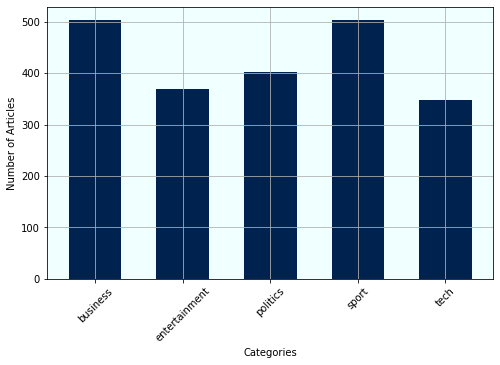

In [ ]:
# Plotting a bar graph to represent all categories and number of articles in them 
df.plot(x = "Category", kind = "bar", 
        figsize=(8,5), grid = True,
        xlabel = "Categories",
        ylabel = "Number of Articles",
        colormap= "cividis", width = 0.6, 
        rot = 45).patch.set_facecolor('#f0ffff')

<u/>**Why this plot?**</u>

A bar diagram makes it easy to compare sets of data between different groups at a glance. They are preferred over other plots because they allow the reader to recognize patterns or trends far more easily than looking at a table of numerical data.

<u/>**Inference**</u>

We can see that **Business** and **Sports** category have the highest number of articles, while for **Tech** category the number is quite low. Number of articles will play a major role in determining the topics in them. Larger the number of articles for a category, higher will be the result satisfaction for the model.  

<u/>**Business Implication**</u>

Readers with business and sport preference can be targeted by using different marketing tactics..

### **Contents**

Reindexing the data and extracting just the contents of the article i.e, the complete transcript of the article.

In [ ]:
# Reindexing the data
reindexed_data = bbc.reset_index()

# Extracting contents of all articles
reindexed_data = reindexed_data["Contents"]

# Display 
reindexed_data

0       china suspends 26 power projects  china has or...
1       lacroix label bought by us firm  luxury goods ...
2       euro firms miss out on optimism  more than 90%...
3       india's reliance family feud heats up  the ong...
4       trial begins of spain's top banker  the trial ...
                              ...                        
2120    piero gives rugby perspective  bbc sport unvei...
2121    china net cafe culture crackdown  chinese auth...
2122    global blogger action day called  the global w...
2123    finding new homes for old phones  re-using old...
2124    open source leaders slam patents  the war of w...
Name: Contents, Length: 2125, dtype: object

As we can see the above dataset has got the complete set of articles, now we can use this dataset to count the top words with highest frequencies using **CountVectorizer**.

In [ ]:
bbc_copy=bbc.copy()

In [ ]:
# Converting column into astring
bbc_copy['Contents'] = bbc_copy['Contents'].astype('str')

In [ ]:
import re
import spacy
import glob
import string
import nltk
nltk.download('omw-1.4')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_md

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-01-23 10:41:58.189615: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 9.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
# Remove new line characters
bbc_copy['Contents'] = [re.sub('\s+', ' ', sent) for sent in bbc_copy['Contents']]

#convert to lowercase
bbc_copy['Contents'] = bbc_copy['Contents'].map(lambda x: x.lower())

# Remove distracting single quotes
bbc_copy['Contents'] = [re.sub("\'", "", sent) for sent in bbc_copy['Contents']]

#Removal of stopwords
bbc_copy['Contents'] = bbc_copy['Contents'].map(lambda x: ' '.join([i for i in x.split(' ') if i not in stopwords.words('english')]))


In [ ]:
# creating new column lungth for length of news
bbc_copy['length']=bbc_copy['Contents'].apply(len)

Text(0, 0.5, 'News Topic')

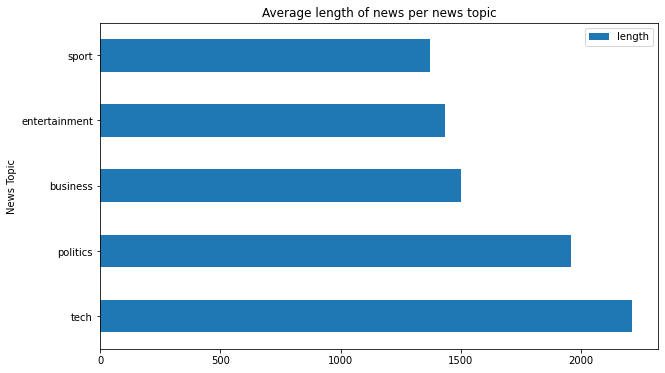

In [ ]:
#average word count per topic
pd.DataFrame(bbc_copy.groupby(["Category"])['length'].agg(np.mean).sort_values(ascending=False)).plot(kind = 'barh',
              title = 'Average length of news per news topic', figsize=(10,6))
plt.ylabel("News Topic")

<u/>**Why this plot?**</u>

A bar diagram makes it easy to compare sets of data between different groups at a glance. They are preferred over other plots because they allow the reader to recognize patterns or trends far more easily than looking at a table of numerical data.

<u/>**Inference**</u>

Technology has the maximum average length of article and Sports has the minimum average length of news article.

<u/>**Business Implication**</u>

Readers of tech would spend more time reading the articles. So, they can be shown more advertisements.

In [ ]:
# Creating new column with number of words
bbc_copy['word_count'] = bbc_copy['Contents'].apply(lambda x: len(str(x).split(" ")))

Text(0, 0.5, 'News Topic')

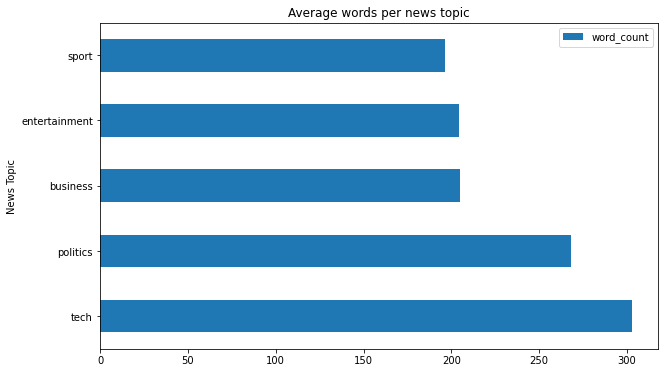

In [ ]:
#average word count per topic
pd.DataFrame(bbc_copy.groupby(["Category"])['word_count'].agg(np.mean).sort_values(ascending=False)).plot(kind = 'barh',
              title = 'Average words per news topic', figsize=(10,6))
plt.ylabel("News Topic")

<u/>**Why this plot?**</u>

A bar diagram makes it easy to compare sets of data between different groups at a glance. They are preferred over other plots because they allow the reader to recognize patterns or trends far more easily than looking at a table of numerical data.

<u/>**Inference**</u>

This follows the same order as average length of news that is Tech has maximum average word count and Sport has lowest average word count.

<u/>**Business Implication**</u>

Readers of tech would spend more time reading the articles. So, they can be shown more advertisements.

In [ ]:
# Creating new dataframes with different news type
bbc_business = bbc_copy[bbc_copy['Category'] == 'business']
bbc_entertainment = bbc_copy[bbc_copy['Category'] == 'entertainment']
bbc_politics = bbc_copy[bbc_copy['Category'] == 'politics']
bbc_sport = bbc_copy[bbc_copy['Category'] == 'sport']
bbc_tech = bbc_copy[bbc_copy['Category'] == 'tech']

## **Length of different news types**

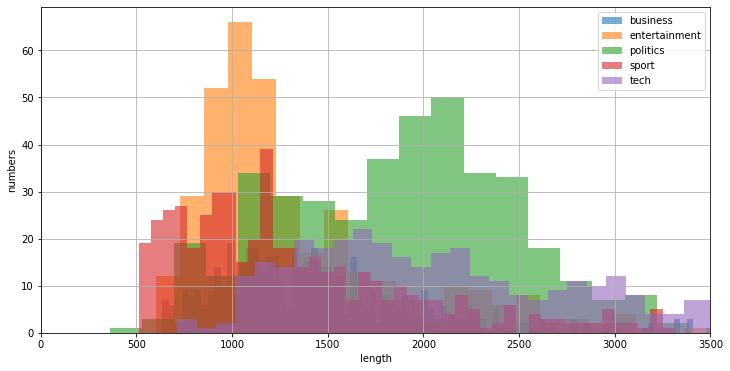

In [ ]:
# creating histogram to see the length of words in different types of news
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 100
plt.hist(bbc_business['length'], alpha = 0.6, bins=bins, label='business')
plt.hist(bbc_entertainment['length'], alpha = 0.6, bins=bins, label='entertainment')
plt.hist(bbc_politics['length'], alpha = 0.6, bins=bins, label='politics')
plt.hist(bbc_sport['length'], alpha = 0.6, bins=bins, label='sport')
plt.hist(bbc_tech['length'], alpha = 0.6, bins=bins, label='tech')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,3500)
plt.grid()
plt.show()

<u/>**Why this plot?**</u>

The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form.

<u/>**Inference**</u>

It shows the distribution of length of different news topics.

<u/>**Business Implication**</u>

Different marketing strategies and initiatives can be made for readers of various types of news.

## **Number of words**

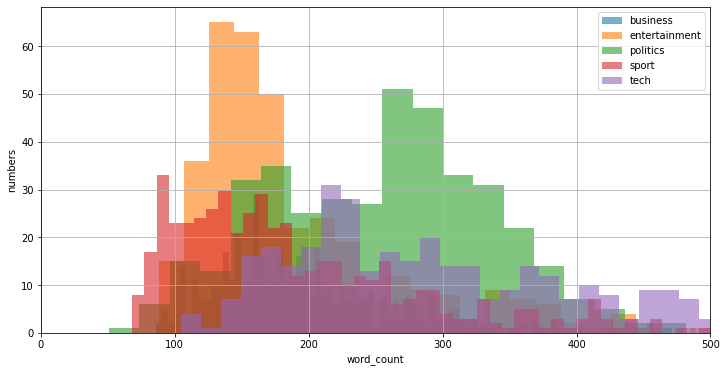

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 100
plt.hist(bbc_business['word_count'], alpha = 0.6, bins=bins, label='business')
plt.hist(bbc_entertainment['word_count'], alpha = 0.6, bins=bins, label='entertainment')
plt.hist(bbc_politics['word_count'], alpha = 0.6, bins=bins, label='politics')
plt.hist(bbc_sport['word_count'], alpha = 0.6, bins=bins, label='sport')
plt.hist(bbc_tech['word_count'], alpha = 0.6, bins=bins, label='tech')
plt.xlabel('word_count')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,500)
plt.grid()
plt.show()

<u/>**Why this plot?**</u>

The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form.

<u/>**Inference**</u>

It shows the distribution of word count of different news topics.

<u/>**Business Implication**</u>

Using this information alongwith reader feedback we can design promotions, offers etc.

#### **CountVectorizer (Top Words)**

In order to use textual data for predictive modeling, the text must be parsed to remove certain words – this process is called **Tokenization**. 

These words then need to be encoded as integers, or floating-point values, such that they can be used as inputs in machine learning algorithms. This process is called **Feature Extraction (or Vectorization)**.

Scikit-learn’s **CountVectorizer** is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample.

*Now that we know what CountVectorizer is, its time we implement it to gather the top-most occuring words in out dataset.*

In [ ]:
# Function to extract top n words with highest frequency
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    The function returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample as inputs
    '''
    # encoding the document using countvectorizer object
    vectorized_content = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_content, axis=0)

    # extracting specifics for words
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)

    # creating a vector matrix for words
    word_vectors = np.zeros((n_top_words, vectorized_content.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    # display Vector matrix
    print(word_vectors)

    # collect the words
    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

**Removing Stopwords using NLTK (Natural Language Toolkit)**

**Stop Words**: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”). Since these words occur a lot, a search engine has to be programmed to ignore them. We can easily remove them by storing a list of words that we consider to be stop words. 

**NLTK**(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages. Hence we'll use it to extract our data without all such words. 

In [ ]:
# dowloading nltk stopwords module
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

We know that all of our articles are in english language, hence we'll only require stopwords in english.

In [ ]:
# extracting all stopwords for english language
stpwrd = nltk.corpus.stopwords.words('english')

# list of stopwords in english language
stpwrd

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

**Now lets implement our countvectorizer to extract top words with highest frequencies.**

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


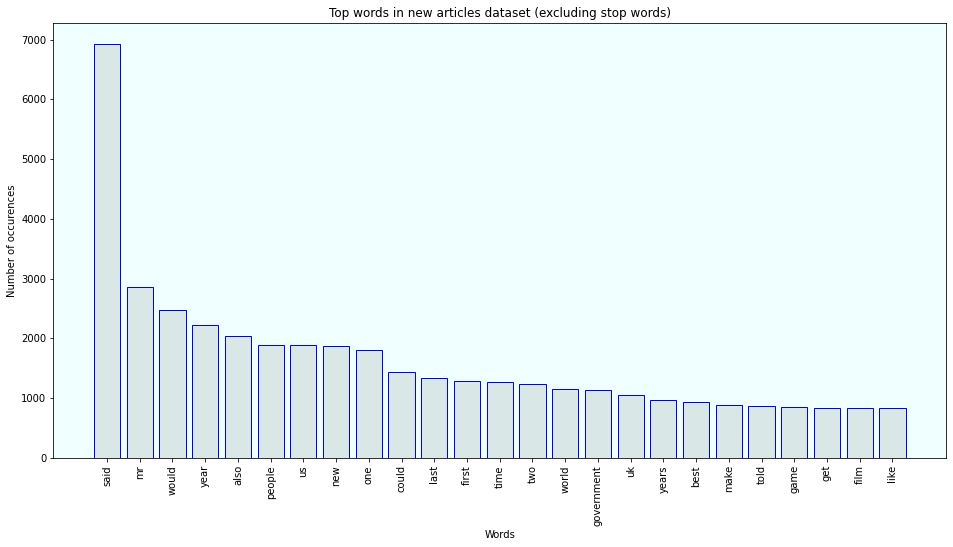

In [ ]:
# creating vectorizer object
count_vectorizer = CountVectorizer(stop_words=stpwrd)

# calling the function to get words and their counts
words, word_values = get_top_n_words(n_top_words=25,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=reindexed_data)

# display top 25 words using bar plot
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in new articles dataset (excluding stop words)')
ax.set_xlabel('Words')
ax.set_ylabel('Number of occurences')
ax.patch.set_facecolor('#f0ffff')
plt.show()

<u/>**Why this plot?**</u>

A bar diagram makes it easy to compare sets of data between different groups at a glance. They are preferred over other plots because they allow the reader to recognize patterns or trends far more easily than looking at a table of numerical data.


<u/>**Observations:**</u>

We can see some commonly used words like "said", "mr", "would" etc, are on top, which makes sense because no matter what the subject of a article is, these words help build up a sentence and hence the excessive use is inevitable. 

However, we can also find a few words relevant to the categories of our articles. For example, '**UK**' and '**US**'(since we converted all words to lower case, 'us' represents US too) both are country names which could reflect to any of the categories. Also words like '**government**' could reflect in articles related to Politics, Business, Tech etc.

The words like '**film**' and '**game**' sounds relevant to the entertainment category.

<u/>**Business Implications**</u>

We know what words readers are used to. So, it will help us in creating marketing materials.

## **Stemming/Lemmatizing the data** (Experimental)

**Stemming** is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. Stemming is important in natural language understanding (NLU) and natural language processing (NLP).

**Lemmatization:** This algorithm collects all inflected forms of a word in order to break them down to their root dictionary form or lemma. Words are broken down into a part of speech (the categories of word types) by way of the rules of grammar.

In [ ]:
# contents of articles
reindexed_data

0       china suspends 26 power projects  china has or...
1       lacroix label bought by us firm  luxury goods ...
2       euro firms miss out on optimism  more than 90%...
3       india's reliance family feud heats up  the ong...
4       trial begins of spain's top banker  the trial ...
                              ...                        
2120    piero gives rugby perspective  bbc sport unvei...
2121    china net cafe culture crackdown  chinese auth...
2122    global blogger action day called  the global w...
2123    finding new homes for old phones  re-using old...
2124    open source leaders slam patents  the war of w...
Name: Contents, Length: 2125, dtype: object

In [ ]:
# downloading wordNet lemmatizer
nltk.download(['wordnet','omw-1.4'])
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# lemmatizing an article to see what wordnet returns
for rows in reindexed_data:
 print(rows)
 test = [lemmatizer.lemmatize(words) for words in rows.split(' ')]
 print(test)
 break

china suspends 26 power projects  china has ordered a halt to construction work on 26 big power stations, including two at the three gorges dam, on environmental grounds.  the move is a surprising one because china is struggling to increase energy supplies for its booming economy. last year 24 provinces suffered black outs. the state environmental protection agency said the 26 projects had failed to do proper environmental assessments. topping the list was a controversial dam on the scenic upper yangtze river. "construction of these projects has started without approval of the assessment of their environmental impact... they are typical illegal projects of construction first, approval next," said sepa vice-director pan yue, in a statement on the agency's website.  some of the projects may be allowed to start work again with the proper permits, but others would be cancelled, he said. altogether, the agency ordered 30 projects halted. other projects included a petrochemicals plant and a 

As we can see the lemmatizer seems to be working fine, the words are segregated into a list. But the issue with this is for some words the lemmatizer returned ambiguous results, for example the first line says "A US government", here the lemmatizer reduced the text "US" to just "u". This takes away the whole meaning of that word.

**Now, lets try the lemmatization using Snowball Lemmatizer.**

In [ ]:
# making a lemmatizer object
sno = nltk.stem.SnowballStemmer('english')

In [ ]:
# lemmatizing an article to see what snowball lemmatizer returns
for rows in reindexed_data:
 print(rows)
 test = [sno.stem(words) for words in rows.split(' ')]
 print(test)
 break

china suspends 26 power projects  china has ordered a halt to construction work on 26 big power stations, including two at the three gorges dam, on environmental grounds.  the move is a surprising one because china is struggling to increase energy supplies for its booming economy. last year 24 provinces suffered black outs. the state environmental protection agency said the 26 projects had failed to do proper environmental assessments. topping the list was a controversial dam on the scenic upper yangtze river. "construction of these projects has started without approval of the assessment of their environmental impact... they are typical illegal projects of construction first, approval next," said sepa vice-director pan yue, in a statement on the agency's website.  some of the projects may be allowed to start work again with the proper permits, but others would be cancelled, he said. altogether, the agency ordered 30 projects halted. other projects included a petrochemicals plant and a 

Again the lemmatizer does its job and we got the list of words but as we can see some words lost their meaning completely. For example, "government" is returned as "govern", this is acceptable to some extent but we also have words like 'accus' and 'countri' derived from accusing and companies respectively. These words do not make any sense at all. This lemmatizer is much more aggresive and hence we encounter more words that lost their meaning. 

**Now lets use TextBlob for the same.**

In [ ]:
# Lemmatizing using textblob
for rows in reindexed_data:
 print(rows)
 test = [Word(words).lemmatize() for words in rows.split(' ')]
 print(test)
 break

china suspends 26 power projects  china has ordered a halt to construction work on 26 big power stations, including two at the three gorges dam, on environmental grounds.  the move is a surprising one because china is struggling to increase energy supplies for its booming economy. last year 24 provinces suffered black outs. the state environmental protection agency said the 26 projects had failed to do proper environmental assessments. topping the list was a controversial dam on the scenic upper yangtze river. "construction of these projects has started without approval of the assessment of their environmental impact... they are typical illegal projects of construction first, approval next," said sepa vice-director pan yue, in a statement on the agency's website.  some of the projects may be allowed to start work again with the proper permits, but others would be cancelled, he said. altogether, the agency ordered 30 projects halted. other projects included a petrochemicals plant and a 

Here also we can see similar problems as we see in other lemmatizers, most words lost their meaning. The results are mostly similar to that of wordnet lemmatizer.

## **Feature Extraction (Vectorization)**

Vectorization is jargon for a classic approach of converting input data from its raw format (i.e. text ) into vectors of real numbers which is the format that ML models support.

The idea is to get some distinct features out of the text for the model to train on, by converting text to numerical vectors.

In [ ]:
# creating a countvectorizer object
count_vectorizer = CountVectorizer(stop_words = stpwrd, max_features = 4000)

# text before vectorization 
text_sample = reindexed_data
print('Content before vectorization: {}'.format(text_sample[123]))

# encode the textual content
document_term_matrix = count_vectorizer.fit_transform(text_sample)

# text after vectorization
print('Content after vectorization: \n{}'.format(document_term_matrix[123]))

Content before vectorization: delta cuts fares in survival plan  delta air lines is cutting domestic fares by as much as 50% as part of a plan to ensure its financial survival.  other us carriers, including united, have sought bankruptcy protection, amid high fuel costs and competition from discount carriers. delta is restructuring in a bid to fight off insolvency. this latest move to boost business has prompted speculation other firms will be forced to match their fares, hurting revenues in the sector. delta's new simplifares were trialled from august last year on tickets from cincinnati, its second-largest hub.  the airline says no one-way economy fare will now be priced higher than $499 (£264), and no first-class fare will be priced higher than $599. it is also eliminating a saturday-night stay requirement on discount fares and will give further reductions to customers opting for non-refundable tickets, booking in advance and online. delta, which lost $646m in the three months to se

We can see that the text was succesfully converted into a vectorized numeric form. The countvectorizer works as intended, we can now move forward to implement the ML model. 

## **Model Development**

Now that all the necessary preprocessing is done, we'll implement the ML model for topic modeling on the BBC news articles. Here we have used the LSA as well as LDAA algorithm for the purpose. Let’s discuss more about the algorithm and its specifics.

## **Latent Semantic Allocation**

In [ ]:
# creating new dataframe for LSA
lsa_df = pd.DataFrame({'Heading' : bbc['Category'],'News': bbc['Contents']})

In [ ]:
lsa_df.head()

,Heading,News
0,business,china suspends 26 power projects china has or...
1,business,lacroix label bought by us firm luxury goods ...
2,business,euro firms miss out on optimism more than 90%...
3,business,india's reliance family feud heats up the ong...
4,business,trial begins of spain's top banker the trial ...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm, tqdm_notebook

In [ ]:
stopword_list = stopwords.words('english')
dtm = CountVectorizer(max_df=0.7, min_df=5, token_pattern="[a-z']+", 
                      stop_words=stopword_list, max_features=2000) # Only top 2000 most frequently ocurring words are considered
dtm.fit(lsa_df['News'])
dtm_mat = dtm.transform(lsa_df['News'])

In [ ]:
tsvd = TruncatedSVD(n_components=200)
tsvd.fit(dtm_mat)
tsvd_mat = tsvd.transform(dtm_mat)

In [ ]:
s_list = []

for clus in tqdm(range(2,21)):

    km = KMeans(n_clusters=clus, n_init=50, max_iter=1000) # Instantiate KMeans clustering

    km.fit(tsvd_mat) # Run KMeans clustering

    s = silhouette_score(tsvd_mat, km.labels_)

    s_list.append(s)

100%|██████████| 19/19 [02:28<00:00,  7.79s/it]


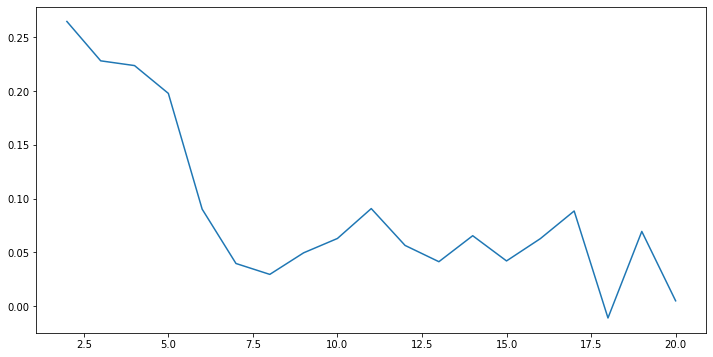

In [ ]:
plt.plot(range(2,21), s_list)

plt.show()

**Why this plot?**

This plot will help us identify the number of clusters for news articles.

**Observation**

Number of clusters ,the best value is k=4.

**Business Implication**

We can create articles under new categories which would represent a different cluster.


In [ ]:
tsne = TSNE(n_components=2)
tsne_mat = tsne.fit_transform(tsvd_mat)

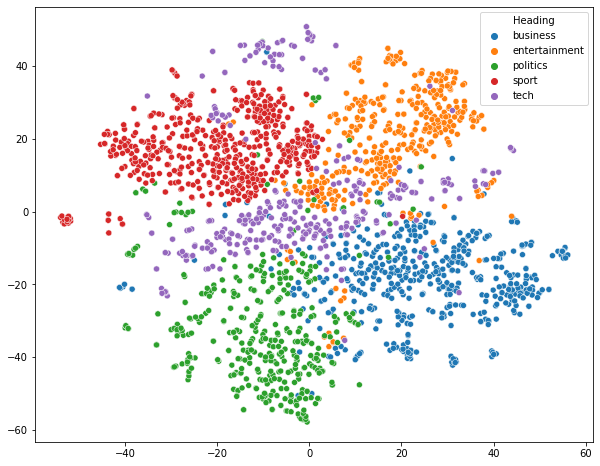

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(tsne_mat[:,0],tsne_mat[:,1],hue=lsa_df['Heading'])

**Why this plot?**

Scatter graphs are used to identify anomalies in the data more easily as well as the overall trend and relationship between the variables. The strength of any relationship can also be visualised.



### **Latent Dirichlet Allocation (LDA)**

Latent Dirichlet Allocation (LDA) is one of most popular topic modeling technique to extract topics from a given corpus. The term latent conveys something that exists but is not yet developed. In other words, latent means hidden or concealed. The Dirichlet model describes the pattern of the words that are repeating together, occurring frequently, and these words are similar to each other.

And this stochastic process uses Bayesian inferences for explaining “the prior knowledge about the distribution of random variables”. In the case of topic modeling, the process helps in estimating what are the chances of the words, which are spread over the document, will occur again? This enables the model to build data points, estimate probabilities, that’s why LDA is a breed of generative probabilistic model.

LDA generates probabilities for the words using which the topics are formed and eventually the topics are classified into documents.

**The LDA makes two key assumptions:**
* Documents are a mixture of topics, and
* Topics are a mixture of tokens (or words)

The end goal of LDA is to find the most optimal representation of the Document-Topic matrix and the Topic-Word matrix to find the most optimized Document-Topic distribution and Topic-Word distribution.

As LDA assumes that documents are a mixture of topics and topics are a mixture of words so LDA backtracks from the document level to identify which topics would have generated these documents and which words would have generated those topics.



In [ ]:
# hyperparameter tuning using Grid Search CV
grid_params = {'n_components' : [5]}

# creating LDA model object
lda = LatentDirichletAllocation()

# fitting the model
lda_model = GridSearchCV(lda, param_grid = grid_params)
lda_model.fit(document_term_matrix)

# best LDA model
best_lda_model = lda_model.best_estimator_
print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(document_term_matrix))

Best LDA model's params {'n_components': 5}
Best log likelihood Score for the LDA model -648073.8821512626
LDA model Perplexity on train data 1638.8571161378582


In [ ]:
# installing pyLDAvis to visualize the results of LDA model
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=1854c264ada61f2acb63982bd2d485606d3337ab945d3c915135e5ae39435ed3
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=ef8bd3423814e68e14a2e69038b7b7272d34e7fe7b81b5ef8ed033ef2c3a0db4
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [ ]:
# importing pyLDAvis module
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping


Now lets visualize the results using pyLDAvis to get the better understanding of the model. This will show us the topics found for all 5 categories and how they're distributed based on preferences.

In [ ]:
# generate and display the graph
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, document_term_matrix, count_vectorizer, mds='tsne')
lda_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  27.131220
3       51.163364 -159.968018       2        1  22.125844
2      -73.144554   21.523815       3        1  19.821545
1      -66.410133 -110.606438       4        1  15.873522
0       54.417324   12.443444       5        1  15.047869, topic_info=         Term         Freq        Total Category  logprob  loglift
2377       mr  2852.000000  2852.000000  Default  30.0000  30.0000
1453     film   824.000000   824.000000  Default  29.0000  29.0000
1570     game   826.000000   826.000000  Default  28.0000  28.0000
482      best   918.000000   918.000000  Default  27.0000  27.0000
2049   labour   777.000000   777.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
251      also   301.496719  2017.572231   Topic5  -5.2502  -0.0070
1789  however   213.735407   500.627794   Topic5  -5.5942   1.0428
2315  million   214.239140   529.641020   Topic5  -5.5919   0.9888
2424      new   256.346755  1858.846967   Topic5  -5.4125  -0.0872
3745       uk   211.478017  1053.364859   Topic5  -5.6049   0.2883

[392 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
0         1  0.244507              000
0         2  0.391212              000
0         3  0.022468              000
0         4  0.129523              000
0         5  0.214109              000
...     ...       ...              ...
3987      5  0.169595            years
3988      5  0.977700              yen
3995      5  0.993914          yugansk
3996      5  0.978088  yuganskneftegas
3997      5  0.996718            yukos

[838 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 2, 1])

**Why this plot?**

The intertopic distance map is a visualization of the topics in a two-dimensional space. The area of these topic circles is proportional to the amount of words that belong to each topic across the dictionary. The circles are plotted using a multidimensional scaling algorithm based on the words they comprise, so topics that are closer together have more words in common.

The bar chart by default shows the 30 most salient terms. The bars indicate the total frequency of the term across the entire corpus. Salient is a specific metric, defined at the bottom of the visualization, that can be thought of as a metric used to identify most informative or useful words for identifying topics in the entire collection of texts. Higher saliency values indicate that a word is more useful for identifying a specific topic. 

**Inference** 

The intertopic distance map tells us that our topics are well segregated. Topic 1 is the most commonly expressed topic. Topic 5 is the least expressed one.

From the above graph we can see the top 30 term for each topic/category in our dataset. This represents the set of words most relevant to each category. Each term in here is extracted from a respective article set and based on their relevancy they're sorted out. Top 30 terms resembles keywords that were encountered the most throughout that category.

**Business Implication**

Marketing tactics for short run can be easily created using the observations.



In [ ]:
# creating docterms dataframe
docterms = lda_panel.token_table.sort_values(by = ['Freq'], ascending=False)

In [ ]:
# display docterms df
docterms

,Topic,Freq,Term
term,,,
3092,3,0.998036,rugby
1453,4,0.997881,film
3746,2,0.997627,ukip
3072,3,0.997438,roddick
403,4,0.997423,awards
...,...,...,...
2049,4,0.001286,labour
1453,3,0.001212,film
1453,1,0.001212,film


Here we can see all the terms with their respective frequencies belonging to each topic/category. We can use this data to develop wordclouds for each topic to represent all relevant terms for that category.

**Creating Dataframe to contain top 50 terms by topic.**

In [ ]:
# create topics dataframe
topicsdf = pd.DataFrame()

In [ ]:
# adding top 50 most relevant terms for each topic to the dataframe
for i in range(1,6):
  Topicdict ={ "Topic":i, "Terms":list(docterms[docterms['Topic']==i]['Term'].head(50))  }
  topicsdf=topicsdf.append(Topicdict,ignore_index=True)
topicsdf

,Topic,Terms
0,1.0,"[sites, users, web, windows, websites, spam, f..."
1,2.0,"[ukip, parmalat, pensioners, g8, airbus, poore..."
2,3.0,"[rugby, roddick, cup, nintendo, ball, chelsea,..."
3,4.0,"[film, awards, actor, actress, nominated, musi..."
4,5.0,"[exports, yukos, oil, yugansk, rosneft, gas, e..."
